<a href="https://colab.research.google.com/github/djontop/Deep-Learning---fasion_mnist/blob/main/DL_Assignment_02_fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_encoded = pd.get_dummies(y_train).replace({False : 0, True : 1})
y_test_encoded = pd.get_dummies(y_test).replace({False : 0, True : 1})

In [ ]:
from matplotlib import pyplot as plt

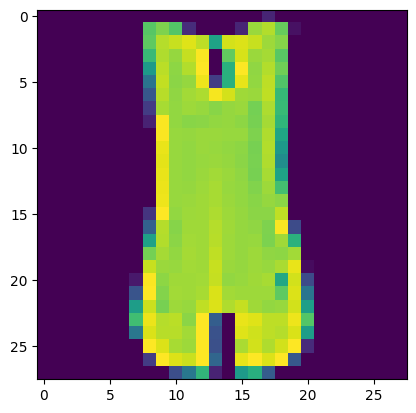

In [ ]:
plt.imshow(x_train[4])
plt.show()

In [ ]:
import math
def to_norm(arr: np.array):
    mean = np.mean(arr)
    std = np.std(arr)
    eps = pow(math.e, -10)
    zscore = (mean - arr) / (std + eps)
    return zscore

In [ ]:
y_lables = {
    0 : "tshirt",
    1 : "trouser",
    2 : "pullover",
    3 : "dress",
    4 : "coat",
    5 : "sandle",
    6 : "shirt",
    7 : "sneaker",
    8 : "bag",
    9 : "ankle boot"
}

*italicized text*

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
model = Sequential()

In [ ]:
# cnn
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())

# fully connected neural network
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_encoded, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1860 - accuracy: 0.9302
Epoch 2/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1780 - accuracy: 0.9330
Epoch 3/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1678 - accuracy: 0.9372
Epoch 4/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1644 - accuracy: 0.9388
Epoch 5/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1566 - accuracy: 0.9418
Epoch 6/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1495 - accuracy: 0.9447
Epoch 7/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1485 - accuracy: 0.9460
Epoch 8/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1441 - accuracy: 0.9472
Epoch 9/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1368 - accuracy: 0.9506
Epoch 10/20
1875/1875 [==============================] - 44s 24m

In [ ]:
loss, acuraccy = model.evaluate(x_test, y_test_encoded)

313/313 [==============================] - 2s 7ms/step - loss: 0.6294 - accuracy: 0.8861


In [ ]:
print("loss ", loss)
print("accuracy ", acuraccy)

loss  0.6293722987174988
accuracy  0.8860999941825867


In [ ]:
test_idx = 4343
test_case = x_train[test_idx]

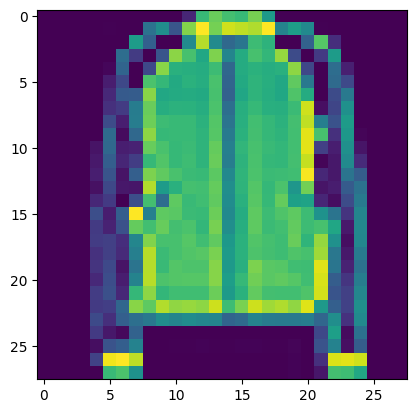

In [ ]:
plt.imshow(test_case)
plt.show()

In [ ]:
pred = model.predict(np.array(test_case).reshape(1,28,28))
np.argmax(pred)
y_lables[np.argmax(pred)]

1/1 [==============================] - 0s 105ms/step


'coat'